In [25]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

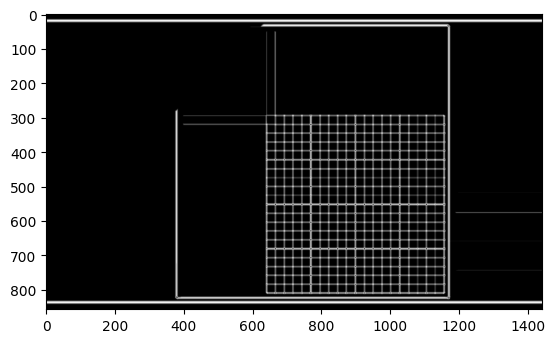

In [209]:
img_in = "20x20.png"

src = cv2.imread(img_in)
# plt.imshow(src[...,::-1])

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
    cv2.THRESH_BINARY, 15, -2)
# plt.imshow(cv2.cvtColor(bw, cv2.COLOR_GRAY2RGB))
# plt.imshow(bw)

bw = cv2.GaussianBlur(bw, (5, 5), 10)

horizontal = np.copy(bw)
vertical = np.copy(bw)

cols = horizontal.shape[1]
horizontal_size = cols // 3

horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
horizontal = cv2.erode(horizontal, horizontal_structure)
horizontal = cv2.dilate(horizontal, horizontal_structure)

# plt.imshow(horizontal)

rows = vertical.shape[0]
vertical_size = rows // 3

vertical_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))
vertical = cv2.erode(vertical, vertical_structure)
vertical = cv2.dilate(vertical, vertical_structure)

lines = vertical + horizontal
plt.imshow(cv2.cvtColor(lines, cv2.COLOR_GRAY2RGB))

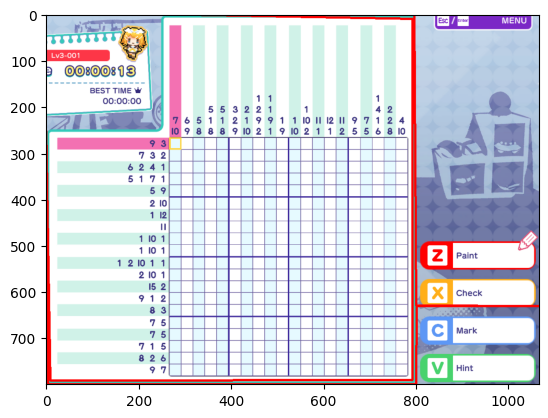

In [210]:
# extract contours and mask
cnts = cv2.findContours(lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
mask = np.zeros(src.shape, dtype=np.uint8)

img_test = np.copy(src)
# img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
largest, largest_size = None, 0

for c in cnts:
    area = cv2.contourArea(c)
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01*peri, closed=True)
    if peri > largest_size and len(approx) >= 4:
        largest_size = peri
        largest = approx
cv2.drawContours(img_test, [largest], 0, (0, 0, 255), 3)

mi_x = min([i[0][0] for i in largest])
mi_y = min([i[0][1] for i in largest])
ma_x = max([i[0][0] for i in largest])
ma_y = max([i[0][1] for i in largest])

img_crop = img_test[mi_y:ma_y, mi_x:ma_x]

plt.imshow(cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB))

[[[1154  292]]

 [[1154  293]]

 [[1154  294]]

 ...

 [[1157  292]]

 [[1156  292]]

 [[1155  292]]]
[[[1129  292]]

 [[1129  293]]

 [[1129  294]]

 ...

 [[1132  292]]

 [[1131  292]]

 [[1130  292]]]
[[[1103  292]]

 [[1103  293]]

 [[1103  294]]

 ...

 [[1106  292]]

 [[1105  292]]

 [[1104  292]]]
[[[1078  292]]

 [[1078  293]]

 [[1078  294]]

 ...

 [[1081  292]]

 [[1080  292]]

 [[1079  292]]]
[[[1052  292]]

 [[1052  293]]

 [[1052  294]]

 ...

 [[1055  292]]

 [[1054  292]]

 [[1053  292]]]
[[[1025  292]]

 [[1025  293]]

 [[1025  294]]

 ...

 [[1028  292]]

 [[1027  292]]

 [[1026  292]]]
[[[ 999  292]]

 [[ 999  293]]

 [[ 999  294]]

 ...

 [[1002  292]]

 [[1001  292]]

 [[1000  292]]]
[[[974 292]]

 [[974 293]]

 [[974 294]]

 ...

 [[977 292]]

 [[976 292]]

 [[975 292]]]
[[[948 292]]

 [[948 293]]

 [[948 294]]

 ...

 [[951 292]]

 [[950 292]]

 [[949 292]]]
[[[923 292]]

 [[923 293]]

 [[923 294]]

 ...

 [[926 292]]

 [[925 292]]

 [[924 292]]]
[[[896 292]]

 [

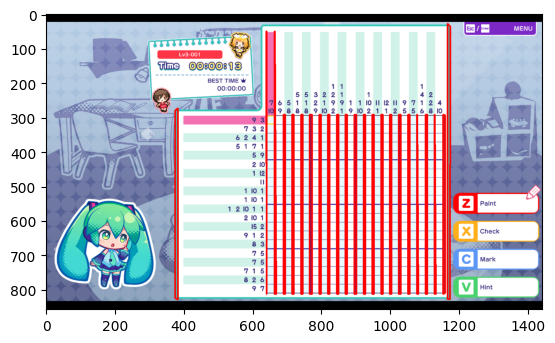

In [259]:
# extract contours and mask
cnts = cv2.findContours(vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
mask = np.zeros(src.shape, dtype=np.uint8)

img_test = np.copy(src)
# img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

def all_within_contours(countours):
    pass

for c in cnts:
    area = cv2.contourArea(c)
    peri = cv2.arcLength(c, False)
    approx = cv2.approxPolyDP(c, 3.5, closed=False)
    if len(approx) >= 1:
        cv2.drawContours(img_test, [approx], 0, (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))